In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
column_remap = {
    '1': 'student_age',
    '2': 'sex',
    '3': 'high_school_type',
    '4': 'scholarship_type',
    '5': 'additional_work',
    '6': 'additional_activity',
    '7': 'partner',
    '8': 'total_salary',
    '9': 'transportation_type',
    '10': 'residency',
    '11': 'mother_education',
    '12': 'father_education',
    '13': 'sibiling_count',
    '14': 'marital_status',
    '15': 'mother_occupation',
    '16': 'father_occupation',
    '17': 'weekly_study_hours',
    '18': 'reading_frequency_fiction',
    '19': 'reading_frequency_non_fiction',
    '20': 'attendance_seminars_confrences',
    '21': 'project_activity_success',
    '22': 'attendence_classes',
    '23': 'midterm_preperation_method',
    '24': 'midterm_preperation_time',
    '25': 'taking_notes',
    '26': 'listening',
    '27': 'discussion_thoughts',
    '28': 'flip_classroom',
    '29': 'GPA_last_semester',
    '30': 'expected_GPA'
}

In [4]:
pd.set_option('display.max_columns', None)

In [4]:
student_data = pd.read_csv('student_data.csv')
student_data.head()

,STUDENT ID,student_age,sex,high_school_type,scholarship_type,additional_work,additional_activity,partner,total_salary,transportation_type,...,midterm_preperation_method,midterm_preperation_time,taking_notes,listening,discussion_thoughts,flip_classroom,GPA_last_semester,expected_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [19]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   STUDENT ID                      145 non-null    object
 1   student_age                     145 non-null    int64 
 2   sex                             145 non-null    int64 
 3   high_school_type                145 non-null    int64 
 4   scholarship_type                145 non-null    int64 
 5   additional_work                 145 non-null    int64 
 6   additional_activity             145 non-null    int64 
 7   partner                         145 non-null    int64 
 8   total_salary                    145 non-null    int64 
 9   transportation_type             145 non-null    int64 
 10  residency                       145 non-null    int64 
 11  mother_education                145 non-null    int64 
 12  father_education                145 non-null    in

In [6]:
student_data_description = student_data.describe()

### EDA

In [27]:
student_data_description.loc[['mean', '50%']]

,student_age,sex,high_school_type,scholarship_type,additional_work,additional_activity,partner,total_salary,transportation_type,residency,mother_education,father_education,sibiling_count,marital_status,mother_occupation,father_occupation,weekly_study_hours,reading_frequency_fiction,reading_frequency_non_fiction,attendance_seminars_confrences,project_activity_success,attendence_classes,midterm_preperation_method,midterm_preperation_time,taking_notes,listening,discussion_thoughts,flip_classroom,GPA_last_semester,expected_GPA,COURSE ID,GRADE
mean,1.62069,1.6,1.944828,3.572414,1.662069,1.6,1.57931,1.627586,1.62069,1.731034,2.282759,2.634483,2.806897,1.172414,2.358621,2.806897,2.2,1.944828,2.013793,1.213793,1.206897,1.241379,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
50%,2.00000,2.0,2.000000,3.000000,2.000000,2.0,2.00000,1.000000,1.00000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000


In [7]:
px.histogram(student_data, x='GRADE')

In [28]:
# extract the feature columns

feature_columns = student_data.columns[1: -2]
feature_columns

Index(['student_age', 'sex', 'high_school_type', 'scholarship_type',
       'additional_work', 'additional_activity', 'partner', 'total_salary',
       'transportation_type', 'residency', 'mother_education',
       'father_education', 'sibiling_count', 'marital_status',
       'mother_occupation', 'father_occupation', 'weekly_study_hours',
       'reading_frequency_fiction', 'reading_frequency_non_fiction',
       'attendance_seminars_confrences', 'project_activity_success',
       'attendence_classes', 'midterm_preperation_method',
       'midterm_preperation_time', 'taking_notes', 'listening',
       'discussion_thoughts', 'flip_classroom', 'GPA_last_semester',
       'expected_GPA'],
      dtype='object')

In [33]:
# use feature columns to create a correlation matrix

feature_data = student_data[feature_columns]
correlation_matrix = feature_data.corr()

fig = px.imshow(correlation_matrix, text_auto=True, width=1000, height=1000)
fig.show()

In [105]:
# sex, attendence_to_seminars, student_age, scholarship_type, high_school_type, transportation_type, residency, mother_education, father_education, mother_occupation,
#sibling_count, expected_GPA, weekly_study_hours, midterm_preperation_time, marital_status, midterm_preperation_method, taking_notes, discussion_thoughts, GPA_last_semester


highly_correlated_features = ['sex', 'attendance_seminars_confrences', 'student_age',
                              'scholarship_type', 'high_school_type', 'transportation_type',
                              'residency', 'mother_education', 'father_education',
                              'mother_occupation', 'sibiling_count', 'expected_GPA',
                              'weekly_study_hours', 'midterm_preperation_time',
                              'marital_status', 'midterm_preperation_method', 'taking_notes',
                              'discussion_thoughts', 'GPA_last_semester']

highly_correlated_df = student_data[highly_correlated_features].copy()
highly_correlated_df.head()

,sex,attendance_seminars_confrences,student_age,scholarship_type,high_school_type,transportation_type,residency,mother_education,father_education,mother_occupation,sibiling_count,expected_GPA,weekly_study_hours,midterm_preperation_time,marital_status,midterm_preperation_method,taking_notes,discussion_thoughts,GPA_last_semester
0,2,1,2,3,3,1,1,1,2,2,3,1,3,1,1,1,3,1,1
1,2,1,2,3,3,1,1,2,3,2,2,3,2,1,1,1,3,3,2
2,2,1,2,3,2,4,2,2,2,2,2,2,2,1,1,1,2,1,2
3,1,1,1,3,1,1,2,1,2,2,5,2,3,2,1,1,3,2,3
4,2,1,2,3,1,1,4,3,3,2,2,2,2,1,1,2,2,2,2


In [106]:
highly_correlated_df.shape

(145, 19)

In [40]:
high_correlations = highly_correlated_df.corr()
fig = px.imshow(high_correlations, text_auto=True, width=1000, height=1000)
fig.show()

In [43]:
# going to violin with expected gpa

px.violin(highly_correlated_df, x='sex', y='attendance_seminars_confrences', color='expected_GPA')

In [44]:
px.violin(highly_correlated_df, x='student_age', y='scholarship_type', color='expected_GPA')

In [47]:
px.violin(highly_correlated_df, x='student_age', y='high_school_type', color='expected_GPA')

In [48]:
px.violin(highly_correlated_df, x='residency', y='transportation_type', color='expected_GPA')

In [49]:
px.violin(highly_correlated_df, x='residency', y='mother_occupation', color='expected_GPA')

In [50]:
px.violin(highly_correlated_df, x='mother_education', y='father_education', color='expected_GPA')

In [51]:
px.violin(highly_correlated_df, x='mother_education', y='mother_occupation', color='expected_GPA')

In [54]:
px.violin(highly_correlated_df, x='mother_education', y='sibiling_count', color='expected_GPA')

In [55]:
px.violin(highly_correlated_df, x='mother_occupation', y='sibiling_count', color='expected_GPA')

In [56]:
px.violin(highly_correlated_df, x='weekly_study_hours', y='midterm_preperation_time', color='expected_GPA')

In [57]:
px.violin(highly_correlated_df, x='midterm_preperation_time', y='marital_status', color='expected_GPA')

In [58]:
px.violin(highly_correlated_df, x='midterm_preperation_time', y='midterm_preperation_method', color='expected_GPA')

In [59]:
px.violin(highly_correlated_df, x='taking_notes', y='discussion_thoughts', color='expected_GPA')

In [62]:
px.histogram(highly_correlated_df, x='sex', color='expected_GPA', barmode='group' )

In [63]:
px.histogram(highly_correlated_df, x='scholarship_type', color='expected_GPA', barmode='group')

In [64]:
px.histogram(highly_correlated_df, x='GPA_last_semester', color='expected_GPA', barmode='group')

### Classification Method: Random Forest

In [5]:
student_data.columns

Index(['STUDENT ID', 'student_age', 'sex', 'high_school_type',
       'scholarship_type', 'additional_work', 'additional_activity', 'partner',
       'total_salary', 'transportation_type', 'residency', 'mother_education',
       'father_education', 'sibiling_count', 'marital_status',
       'mother_occupation', 'father_occupation', 'weekly_study_hours',
       'reading_frequency_fiction', 'reading_frequency_non_fiction',
       'attendance_seminars_confrences', 'project_activity_success',
       'attendence_classes', 'midterm_preperation_method',
       'midterm_preperation_time', 'taking_notes', 'listening',
       'discussion_thoughts', 'flip_classroom', 'GPA_last_semester',
       'expected_GPA', 'COURSE ID', 'GRADE'],
      dtype='object')

In [6]:
student_data.head()

,STUDENT ID,student_age,sex,high_school_type,scholarship_type,additional_work,additional_activity,partner,total_salary,transportation_type,...,midterm_preperation_method,midterm_preperation_time,taking_notes,listening,discussion_thoughts,flip_classroom,GPA_last_semester,expected_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [114]:
X = highly_correlated_df.copy()
Y = student_data["GRADE"].copy()

In [7]:
X = student_data.drop(['STUDENT ID', 'COURSE ID', 'GRADE'], axis=1)
Y = student_data["GRADE"].copy()

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 50, 75, 85, 95, 100],
    'max_depth': [2, 3, 4, 5, 7, 10],
}

In [118]:
rf = RandomForestClassifier(criterion='gini', random_state=42)

grid_rf = GridSearchCV(rf, param_grid, cv=10)
grid_rf.fit(X_train, y_train)

c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 7, 10],
                         'n_estimators': [5, 10, 15, 20, 25, 50, 75, 85, 95,
                                          100]})

In [119]:
print(grid_rf.best_estimator_)
print(grid_rf.best_params_)
print(grid_rf.get_params)

# print(grid_rf.cv_results_)

RandomForestClassifier(max_depth=4, random_state=42)
{'max_depth': 4, 'n_estimators': 100}
<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 7, 10],
                         'n_estimators': [5, 10, 15, 20, 25, 50, 75, 85, 95,
                                          100]})>


In [120]:
rf = RandomForestClassifier(criterion='gini', max_depth=4, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
rfc_pred = rf.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))

Model accuracy score: 0.1034


In [121]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Text(0.5, 1.0, 'Random Forest Feature Importance')

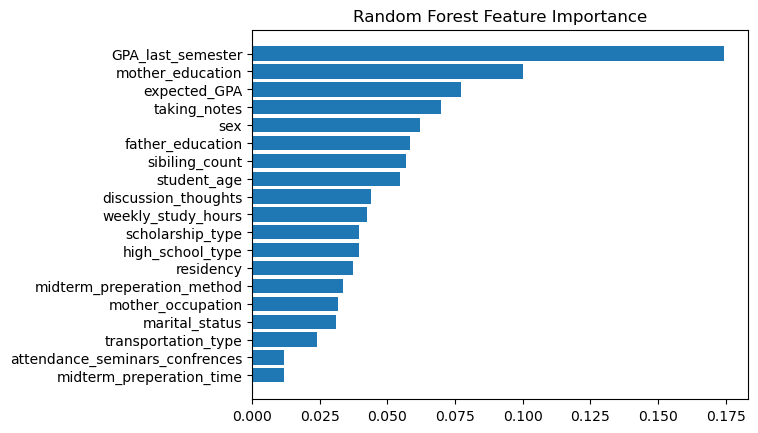

In [122]:
import matplotlib.pyplot as plt

sorted_idx = rf.feature_importances_.argsort()

plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title('Random Forest Feature Importance')


In [123]:
from sklearn.metrics import accuracy_score

rfc_pred = rf.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))

Model accuracy score: 0.1379


In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.13      1.00      0.23         3
           2       0.00      0.00      0.00         4
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2

    accuracy                           0.14        29
   macro avg       0.04      0.15      0.05        29
weighted avg       0.05      0.14      0.06        29

[[0 4 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 5 0 1 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0]
 [0 1 1 2 0 0 0 0]
 [0 1 0 1 0 0 0 0]]


c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

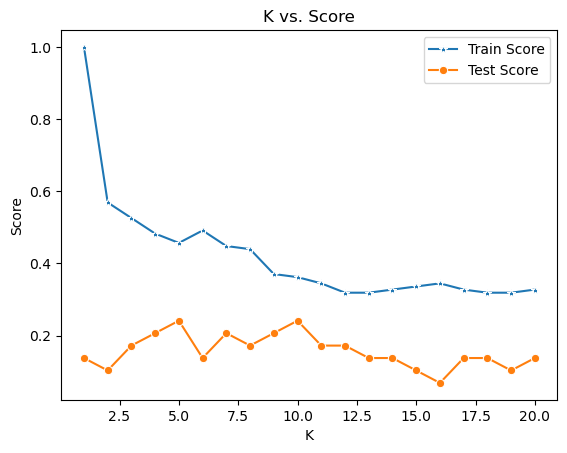

In [125]:
from sklearn.neighbors import KNeighborsClassifier

# append scores here for plotting later
test_scores = []
train_scores = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

import seaborn as sns  
sns.lineplot(x=range(1,21), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,21), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [126]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.2413793103448276

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.17      0.67      0.27         3
           2       0.20      0.25      0.22         4
           3       0.67      0.67      0.67         6
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2

    accuracy                           0.24        29
   macro avg       0.13      0.20      0.14        29
weighted avg       0.18      0.24      0.20        29

[[0 3 0 0 1 0 0 0]
 [0 2 1 0 0 0 0 0]
 [0 3 1 0 0 0 0 0]
 [0 0 0 4 0 1 0 1]
 [0 1 1 0 0 1 0 0]
 [0 2 0 1 0 0 0 0]
 [0 0 1 1 0 1 0 1]
 [0 1 1 0 0 0 0 0]]


c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-d

### Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_GNB = gnb.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_GNB)))

Model accuracy score: 0.1379


In [51]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.3103
Test set score: 0.1379


In [62]:
from sklearn.model_selection import cross_val_score

# Applying 10-Fold Cross Validation
scores = cross_val_score(gnb, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.08333333 0.13043478 0.13043478 0.17391304 0.08695652]

Average cross-validation score: 0.1210


### Neural Networks

In [88]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500, activation='relu', random_state=10)
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1 1 0 0 0 0 0 0]
 [0 2 0 1 1 0 2 1]
 [0 1 1 1 1 1 0 0]
 [0 0 1 2 0 1 0 0]
 [0 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 0 1]
 [0 0 1 1 0 0 1 0]
 [0 0 1 1 0 0 1 0]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.40      0.29      0.33         7
           2       0.25      0.20      0.22         5
           3       0.29      0.50      0.36         4
           4       0.00      0.00      0.00         2
           5       0.33      0.33      0.33         3
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         3

    accuracy                           0.28        29
   macro avg       0.31      0.27      0.28        29
weighted avg       0.31      0.28      0.28        29



c:\Users\Sandy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
